<a href="https://colab.research.google.com/github/somyamangla/SalaryPrediction/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given a dataset which captures gross salary from july 2013 through jun 2014 and includes only those employees who were employeedmon jun 2014 Predict salaries for employees in blatimore

**OUTLINE**
1. Import dataset
2. Data Cleaning anf preparation
3. Exploratory Data Aanlysis
4. Feature Engineering
5. train test split
6. Model building
7. Model Evaluation









In [ ]:
import zipfile
!unzip /content/salaryzip.zip

Archive:  /content/salaryzip.zip
  inflating: salaryzip/trainfile.csv  


In [ ]:
# for analysis
import numpy as np
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for train test split
from sklearn.model_selection import train_test_split
#for scaling
from sklearn.preprocessing import StandardScaler
#model building
from sklearn.linear_model import LinearRegression
#supressing warnings
import warnings
warnings.filterwarnings('ignore')

importing dataset

In [ ]:
salary=pd.read_csv('salaryzip/trainfile.csv')

In [ ]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


Data Cleaning and Preparation

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


There are 18981 rows in dataset. 
There are 7 columns.
All columns are of type object.


In [ ]:
salary_cpy=salary.copy()

In [ ]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
#name is having space leading space so we have to remove it 
#if space after same method
salary_cpy.columns=salary_cpy.columns.str.strip()

In [ ]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
# checking null values 
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

hire date null values can be dropped as it is less than 1 percent of data

In [ ]:
salary_cpy=salary_cpy.dropna(subset=['HireDate'])

salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


we can drop gross pay as at the end we have to predict salary so even if can take annual or gross as a target column and in addition to this both columns are interdependent


In [ ]:
#dropping gross pay
salary_cpy=salary_cpy.drop('GrossPay',axis=1)

salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [ ]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02382      1
W02166      1
W02540      1
W02681      1
W02684      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencyid so, these number of agencies should be there

In [ ]:
#value count for agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64

but from this we can see that one agency must be having different agency ids

In [ ]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
DIR EARLY INTERVENTION SVCS          1
DIRECTOR GERIATRIC HEALTH SERV       1
OFFICE MANAGER SAO                   1
REAL ESTATE APPRAISER III            1
CABLE INSPECTION SUPERVISOR          1
Name: JobTitle, Length: 1073, dtype: int64

In [ ]:
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
04/08/2005       1
03/29/2000       1
12/11/1978       1
04/02/1991       1
07/17/1973       1
Name: HireDate, Length: 4737, dtype: int64

In [ ]:
#remove dollar from annual salary
salary_cpy['AnnualSalary']=salary_cpy['AnnualSalary'].apply(lambda x: (float)(str(x)[1:]))

In [ ]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [ ]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [ ]:
#trimming all categoriacl columns to make sure there are no trailing or leading spaces and also no doble spaces between words

In [ ]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x:str(x).strip().replace("  "," "))
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x:str(x).strip().replace("  "," "))
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x:str(x).strip().replace("  "," "))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013




---



In [ ]:
#converting all job titles to upper case as there are a mox value present
#also convertig agency and agency id
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x : str(x).upper())

In [ ]:
salary_cpy.shape

(18911, 9)

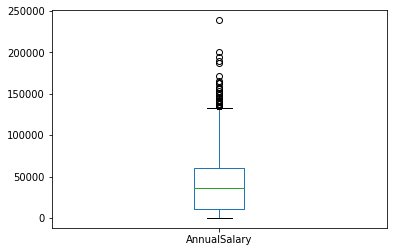

In [ ]:
#removing the outliers
#creating box plot
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [ ]:
#eliminate outliers
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [ ]:
#delete rows whose annual salary is greater than 150000 acc to box plot
salary_cpy=salary_cpy[salary_cpy['AnnualSalary']<140000]

In [ ]:
salary_cpy.shape

(18885, 9)

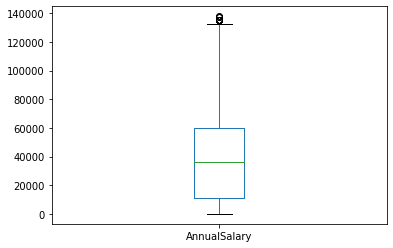

In [ ]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

Data Preparation has been done so we can proceed to Exploratory Data Analysis

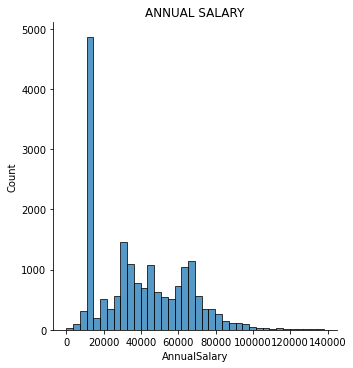

In [ ]:
#check diistribution of annual salary
sns.displot(salary_cpy.AnnualSalary)
plt.title("ANNUAL SALARY")
plt.show()

Data is distrubed very randomly and there seems to be not many people with salary more than 100000

In [ ]:
#check which people are hired the most for a job
#done by creating a boxplot

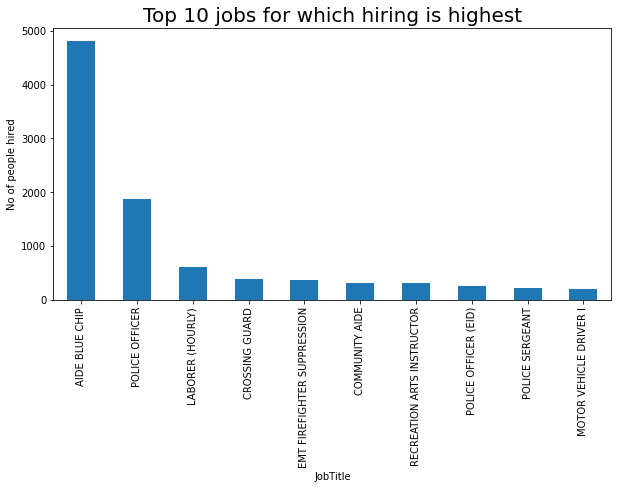

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people hired')
plt.title('Top 10 jobs for which hiring is highest', fontsize=20)
plt.show()


More number of people where hired for blue chip followed by job of police officer
All other than these 2 job titles have less than 1000 workers


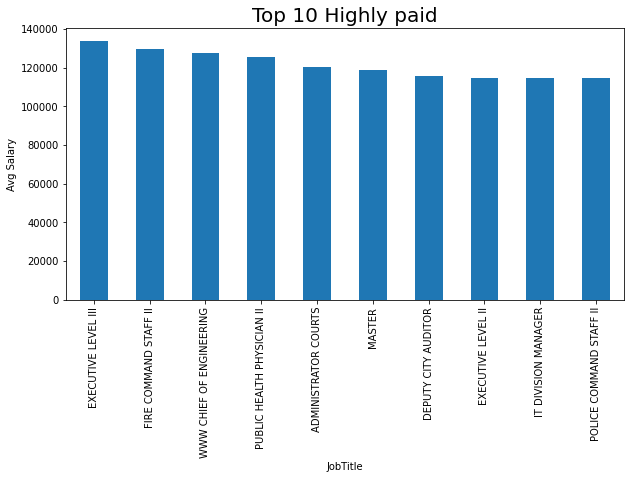

In [ ]:
#jobs that fetch highest salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title('Top 10 Highly paid', fontsize=20)
plt.show()

We can conclue that for high salary very less people were hired

In [ ]:
#no of jobs avg pay is more than total avg salary
#find total avg salary
mean_sal=salary_cpy.AnnualSalary.mean()

good_paying_jobs=salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

797

In [ ]:
good_paying_jobs

,JobTitle,AnnualSalary
0,911 LEAD OPERATOR,47886.000000
1,911 OPERATOR,42835.743590
2,911 OPERATOR SUPERVISOR,54797.500000
3,ACCOUNT EXECUTIVE,42960.000000
4,ACCOUNTANT I,46316.642857
...,...,...
1049,ZONING ADMINISTRATOR,82100.000000
1050,ZONING APPEALS ADVISOR BMZA,59274.000000
1051,ZONING ENFORCEMENT OFFICER,62000.000000
1052,ZONING EXAMINER I,43674.000000


Checking agency and agency id for highst number of empoyees

Text(0.5, 1.0, 'Top agencies with highest number of employees')

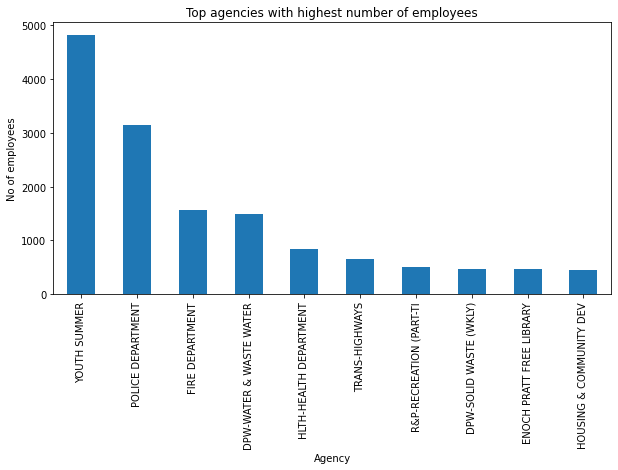

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("No of employees")
plt.title("Top agencies with highest number of employees")

Text(0.5, 1.0, 'Top agenciYID with highest number of employees')

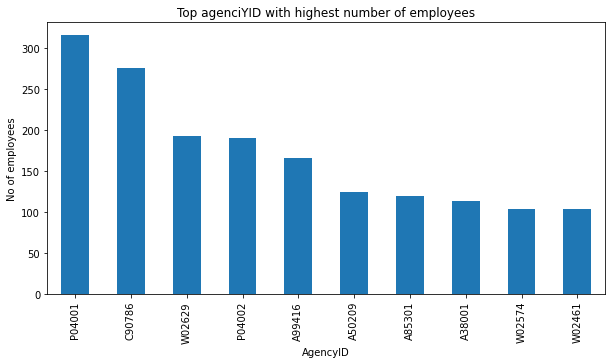

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("No of employees")
plt.title("Top agenciYID with highest number of employees")

Year with lowest salary 
Checking if salary increases or decreases with hire year

Text(0.5, 1.0, 'year with annual salary')

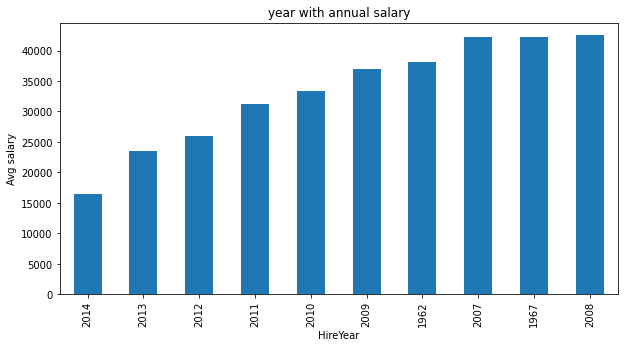

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel("Avg salary")
plt.title("year with annual salary")

As year increases salary is decreasing 
So this suggests that the salary of employees increases with experiance in the company

Text(0.5, 1.0, 'Months with annual salary')

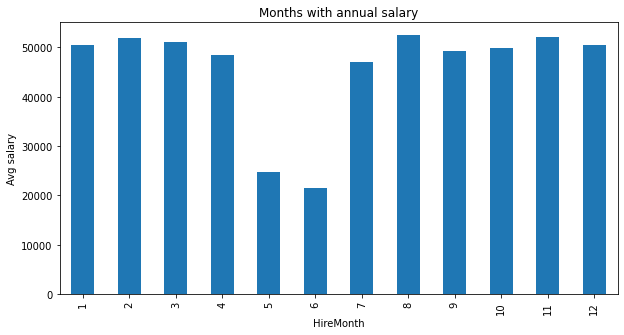

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel("Avg salary")
plt.title("Months with annual salary")

Text(0.5, 1.0, 'No of employees hired in each month')

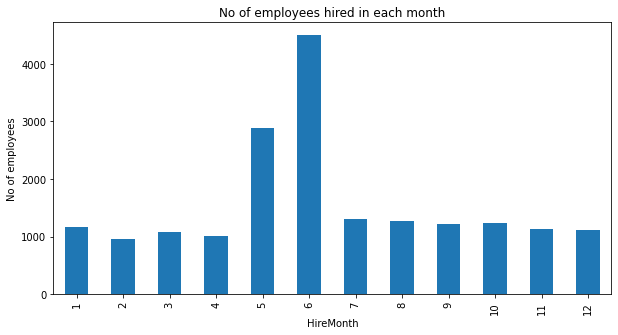

In [ ]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel("No of employees")
plt.title("No of employees hired in each month")

This shows more employees hired in month of may and june but with relatively lower avg annual salary

<Figure size 1080x720 with 0 Axes>

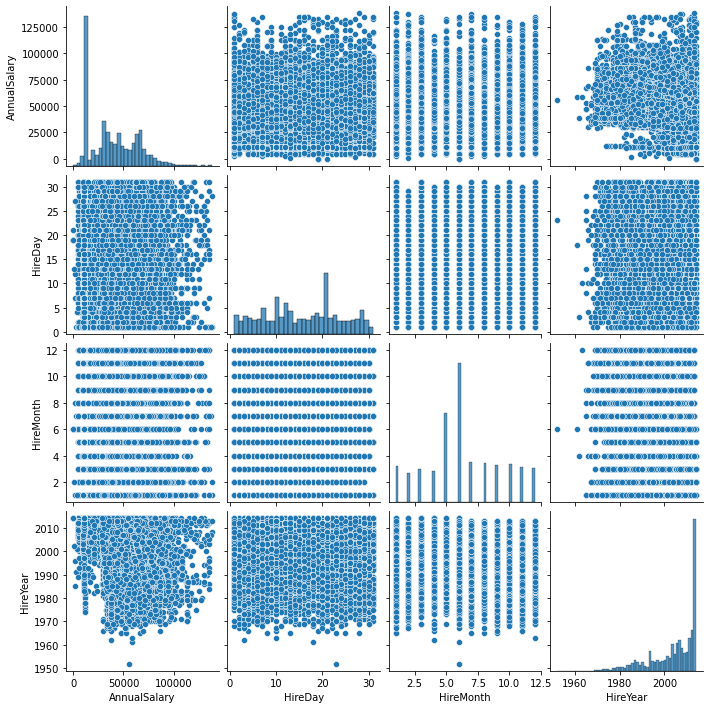

In [ ]:
#checking if there is a relation between numerical variables
plt.figure(figsize=(15,10))
sns.pairplot(salary_cpy)
plt.show()

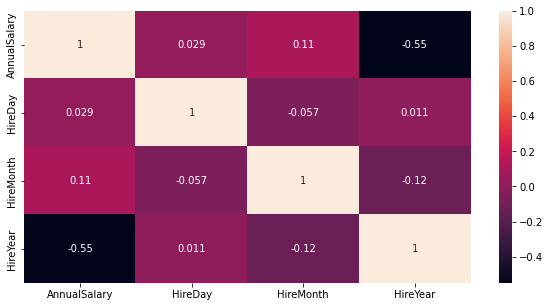

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)

**FEATURE ENGINEERING**

In [ ]:
salary_master=salary_cpy.copy()

In [ ]:
#using mean hot encoding


In [ ]:
#encding for job title
mean_job=salary_master.groupby(['JobTitle'])['AnnualSalary'].mean()
salary_master['JobTitle']=salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']


0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [ ]:
#encding for agency
mean_agency=salary_master.groupby(['Agency'])['AnnualSalary'].mean()
salary_master['Agency']=salary_master['Agency'].map(mean_agency)
salary_master['Agency']

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11313.967200
18977    11313.967200
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [ ]:
#encding for agencyid
mean_agencyid=salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID']=salary_master['AgencyID'].map(mean_agencyid)
salary_master['AgencyID']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

In [ ]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18885 non-null  object 
 1   JobTitle      18885 non-null  float64
 2   AgencyID      18885 non-null  float64
 3   Agency        18885 non-null  float64
 4   HireDate      18885 non-null  object 
 5   AnnualSalary  18885 non-null  float64
 6   HireDay       18885 non-null  int64  
 7   HireMonth     18885 non-null  int64  
 8   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
#drop hire date as not relevant
salary_master=salary_master.drop(['HireDate','Name'],axis=1)

salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


**TRAIN TEST SPLIT**

In [ ]:
salary_train, salary_test=train_test_split(salary_master,train_size=0.7, random_state=10)

random_state will ensure that every 10 values will be left after taking a value and like this 70 percent will be taken

In [ ]:
print(salary_test.shape)
print(salary_train.shape)

(5666, 7)
(13219, 7)


In [ ]:
#deviding in dependent and independent variable
#annual salary is dependent as we have to predict salary
y_train=salary_train.pop('AnnualSalary')
x_train=salary_train

y_test=salary_test.pop('AnnualSalary')
x_test=salary_test

In [ ]:
above can also be written as
y_test=salary_test['AnnualSalary']
x_test=salary_test['',''] all other column names

FEATURE SCALING

In [ ]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,21570.423841,21474.446429,31494.602740,26,3,2007
7529,11313.967200,11310.000000,11313.967200,16,6,2014
15366,11313.967200,11310.000000,11313.967200,10,6,2013
3237,11313.967200,11310.000000,11313.967200,11,6,2009
16659,11313.967200,11310.000000,11313.967200,19,6,2014
...,...,...,...,...,...,...
9453,11313.967200,11310.000000,11313.967200,21,5,2014
7371,29925.666667,33754.400000,31594.490526,4,3,2002
17822,34098.128205,38263.434783,31494.602740,27,5,1999
7373,42275.081081,62661.900000,62661.900000,6,10,1969


In [ ]:
y_train

2110     19802.0
7529     11310.0
15366    11310.0
3237     11310.0
16659    11310.0
          ...   
9453     11310.0
7371     30119.0
17822    36370.0
7373     47382.0
17767    36282.0
Name: AnnualSalary, Length: 13219, dtype: float64

In [ ]:
#scaling of values is required as values are diff so one feature should not overpower the other
#standardization will be done

In [ ]:
scaler=StandardScaler()
x_train[x_train.columns]=scaler.fit_transform(x_train[x_train.columns])
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,-0.739384,-0.813601,-0.382481,1.220063,-1.143251,0.282241
7529,-1.162446,-1.272054,-1.345816,0.026686,-0.124696,0.955021
15366,-1.162446,-1.272054,-1.345816,-0.689340,-0.124696,0.858910
3237,-1.162446,-1.272054,-1.345816,-0.570003,-0.124696,0.474464
16659,-1.162446,-1.272054,-1.345816,0.384699,-0.124696,0.955021
...,...,...,...,...,...,...
9453,-1.162446,-1.272054,-1.345816,0.623375,-0.464215,0.955021
7371,-0.394744,-0.259730,-0.377713,-1.405367,-1.143251,-0.198316
17822,-0.222637,-0.056356,-0.382481,1.339401,-0.464215,-0.486650
7373,0.114649,1.044104,1.105307,-1.166691,1.233377,-3.369991


In [ ]:
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])


**MODEL BUILDING**

In [ ]:
example_df = pd.DataFrame({'Performance':[1,2,3,4,5,6], 
                           'level':[2,5,4,6,1,3],
                           'salary':[100,300,200,600,200,500]})
example_df

,Performance,level,salary
0,1,2,100
1,2,5,300
2,3,4,200
3,4,6,600
4,5,1,200
5,6,3,500


In [ ]:
example_lr= LinearRegression()
example_model = example_lr.fit(example_df[['Performance','level']],example_df['salary'])

In [ ]:
#calculating rsquare
example_model.score(example_df[['Performance','level']],example_df['salary'])

0.8579646017699115

In [ ]:
print(example_lr.coef_)
print(example_lr.intercept_)

[70.83333333 75.83333333]
-196.66666666666669


applying lr on actual data

In [ ]:
lr = LinearRegression()

salary_reg = lr.fit(x_train,y_train)

In [ ]:
salary_reg.score(x_train,y_train)

0.9652498067695455

In [ ]:
salary_reg.score(x_test,y_test)

0.9647181159099966

In [ ]:
print(salary_reg.coef_)
print(salary_reg.intercept_)

[22107.57351879  2772.01552827 -1638.49731197   -78.87693955
  -103.80442772 -2104.19216623]
39505.76539904681


In [ ]:
y_pred=salary_reg.predict(x_test)

In [ ]:
y_pred

array([58753.65393119, 10473.55438818, 10575.79726306, ...,
       57568.54532912, 65333.00342629, 11179.25048703])

In [ ]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64

In [ ]:
#out of all features agenyid,job title and hireday are the major driver for salary measure
#as they have higher slope value
#other than first 2 , all other are negatively corelated with annual salary


if model is performing good on training and not on test then overfitting is there and if the model is not performing wel on either on train data or test data then underfitting is there 
these are treated by regularization
hyperparameter tuning